# SEGMENTATION

# Etapes du projets 

- Analyse exploratoire des données
- Analyse en composante principales
- Clustering K-means avec la méthode du coude 

### segmentation des données : définition:
Le *clustering* est une technique d'apprentissage automatique non supervisé dont l'objectif
est de regrouper les groupes sousjacents dans le jeu de donnée. 

# Analyse exploratoire des données 

In [8]:
# importons nos packahes: 
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA

from scipy.stats import pearsonr

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer



# Description de notre jeu de donnée: 

L'ensemble de données comprend les dépenses annuelles pour différents types de produits de vente au détail (par exemple épiceries, surgelé, épicerie fines)

In [9]:
# import des données

chemin = "./custumers.csv"

df = pd.read_csv(chemin)

In [10]:
# les cinq premières lignes

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<Axes: xlabel='Channel'>

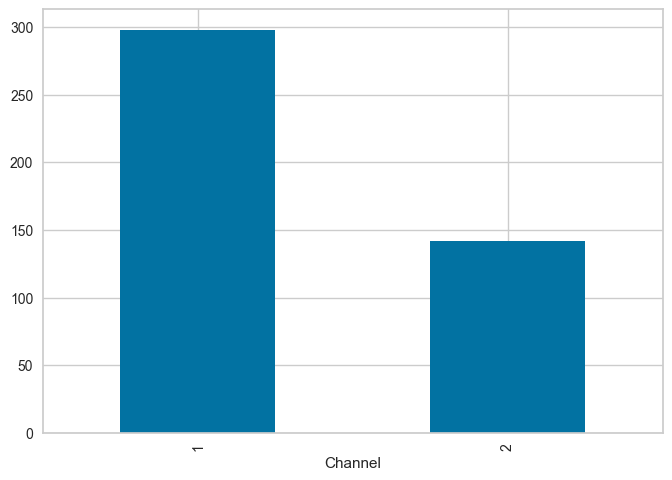

In [11]:
# on veut connaitre les types de distribution: 

df['Channel'].value_counts().plot(kind="bar")

<Axes: xlabel='Region'>

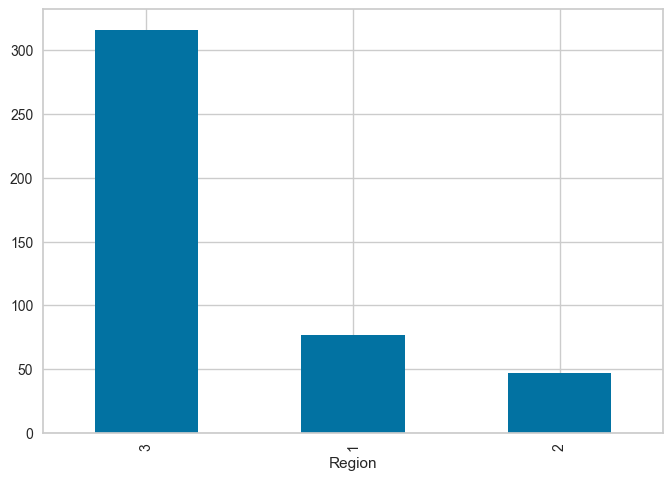

In [12]:
# on veut savoir les regions
"""1: lisbone 2: porto 3: others"""

df['Region'].value_counts().plot(kind="bar")

In [13]:
# On peut changer le nom des variables et les modalités:
# la fonction map() me permet de modifier le nom des valeurs dans les variables

df = df.rename(columns= {"Delicassen": "Delicatessen"}) # Delicatessem: épicerie fine

df["Channel"] = df["Channel"].map({1: "HoReca", 2: "Retail"}) # Retail : vente au détail

df["Region"] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other'})

In [14]:
# Table de fréquence  de la variable 'Region':

df["Region"].value_counts()

Region
Other     316
Lisbon     77
Porto      47
Name: count, dtype: int64

In [15]:
# Table de fréquence normalisée:

df['Region'].value_counts(normalize= True)

Region
Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [16]:
# Stocker le nom des colonnes dans une liste 

features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [17]:
# afficher les resumés statistiques 

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
# quelques infos sur les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [19]:
# sauvegarde de df au format csv :
# dans le cas où on a nettoyé nos données et qu'on veyt conserver la version csv

df.to_csv("./data_prepocessed.csv")

In [20]:
# importer le csv nettoyé 

df = pd.read_csv("./data_prepocessed.csv", index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [21]:
#structure du df

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


In [22]:
# verification des valeurs manquantes

df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Il n y a pas de valeurs manquantes. 

### Visualisation des données

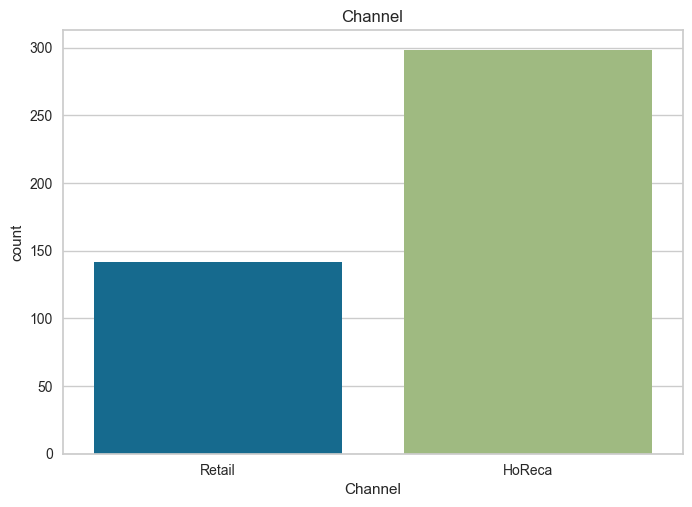

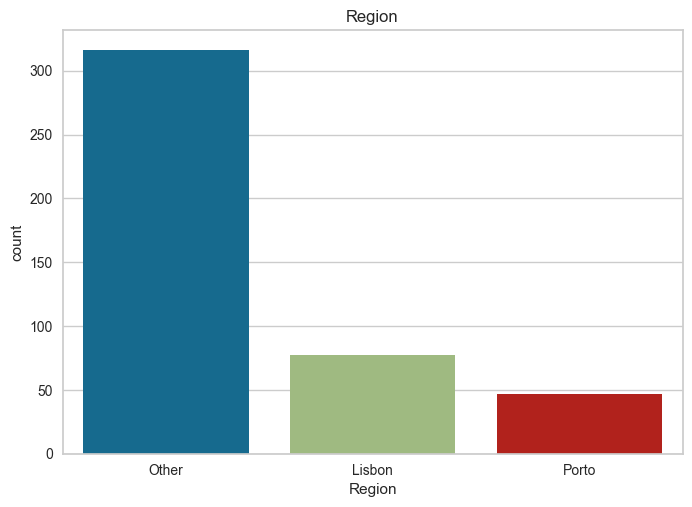

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


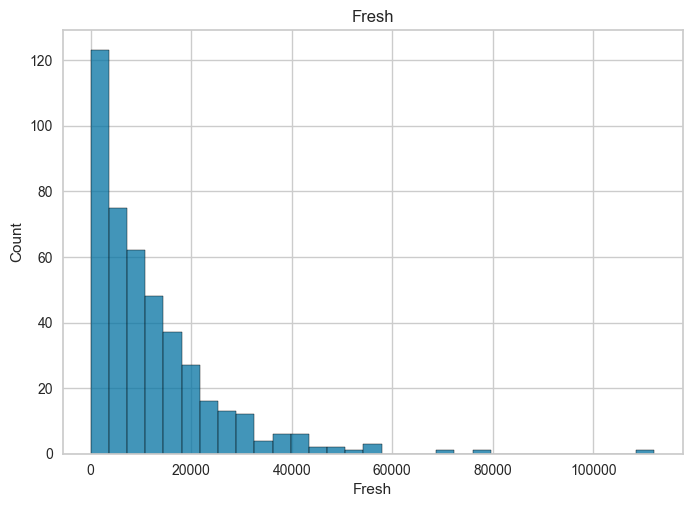

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


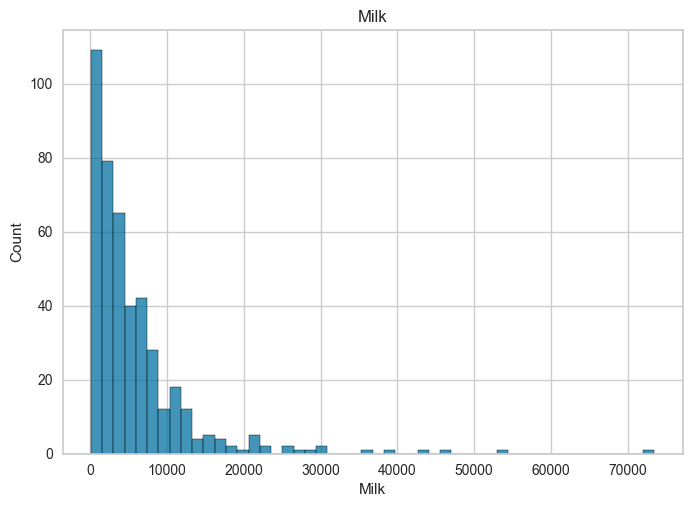

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


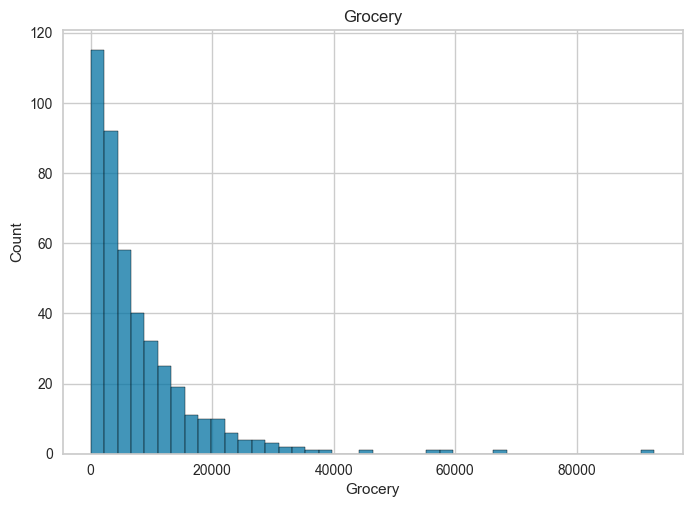

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


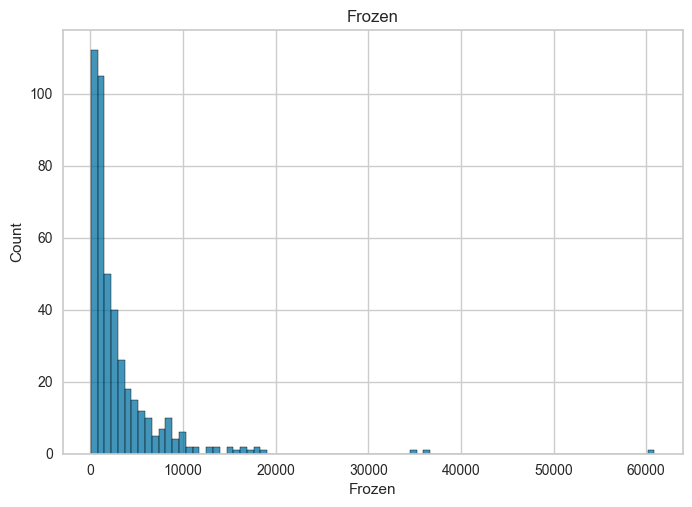

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


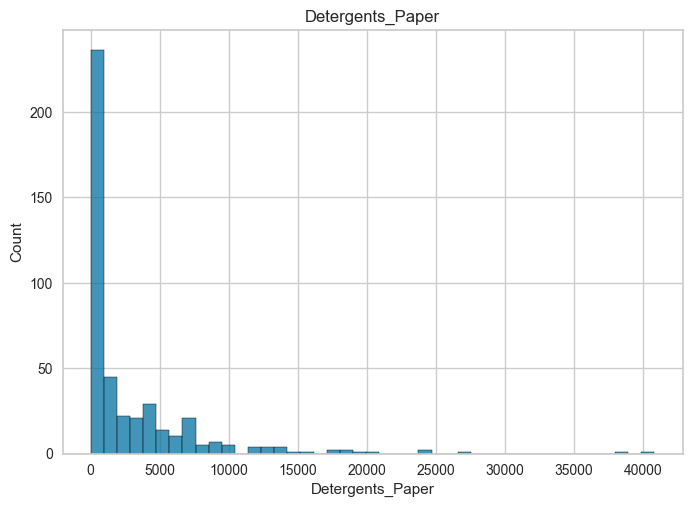

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


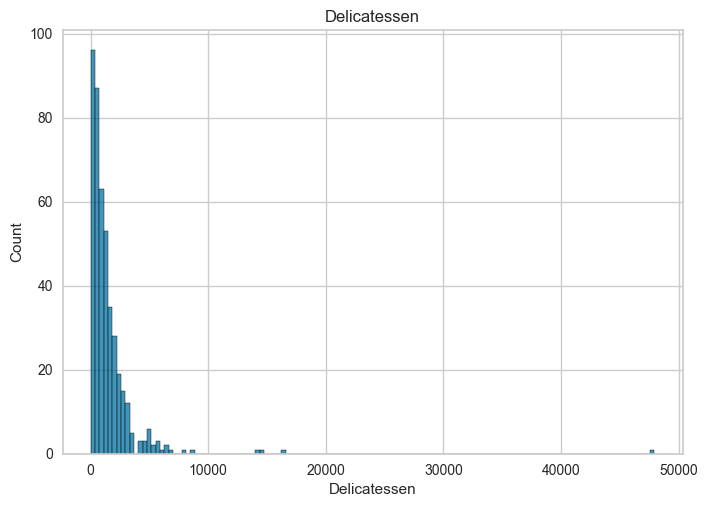

In [23]:
# diagramme en barre et histogrammes

for feature in features:
    if (feature == 'Channel') | (feature == 'Region'):
        sns.countplot(df, x=feature).set_title(feature)
        plt.show() 
    else: 
        sns.histplot(df, x= feature).set_title(feature)
        plt.show()


C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

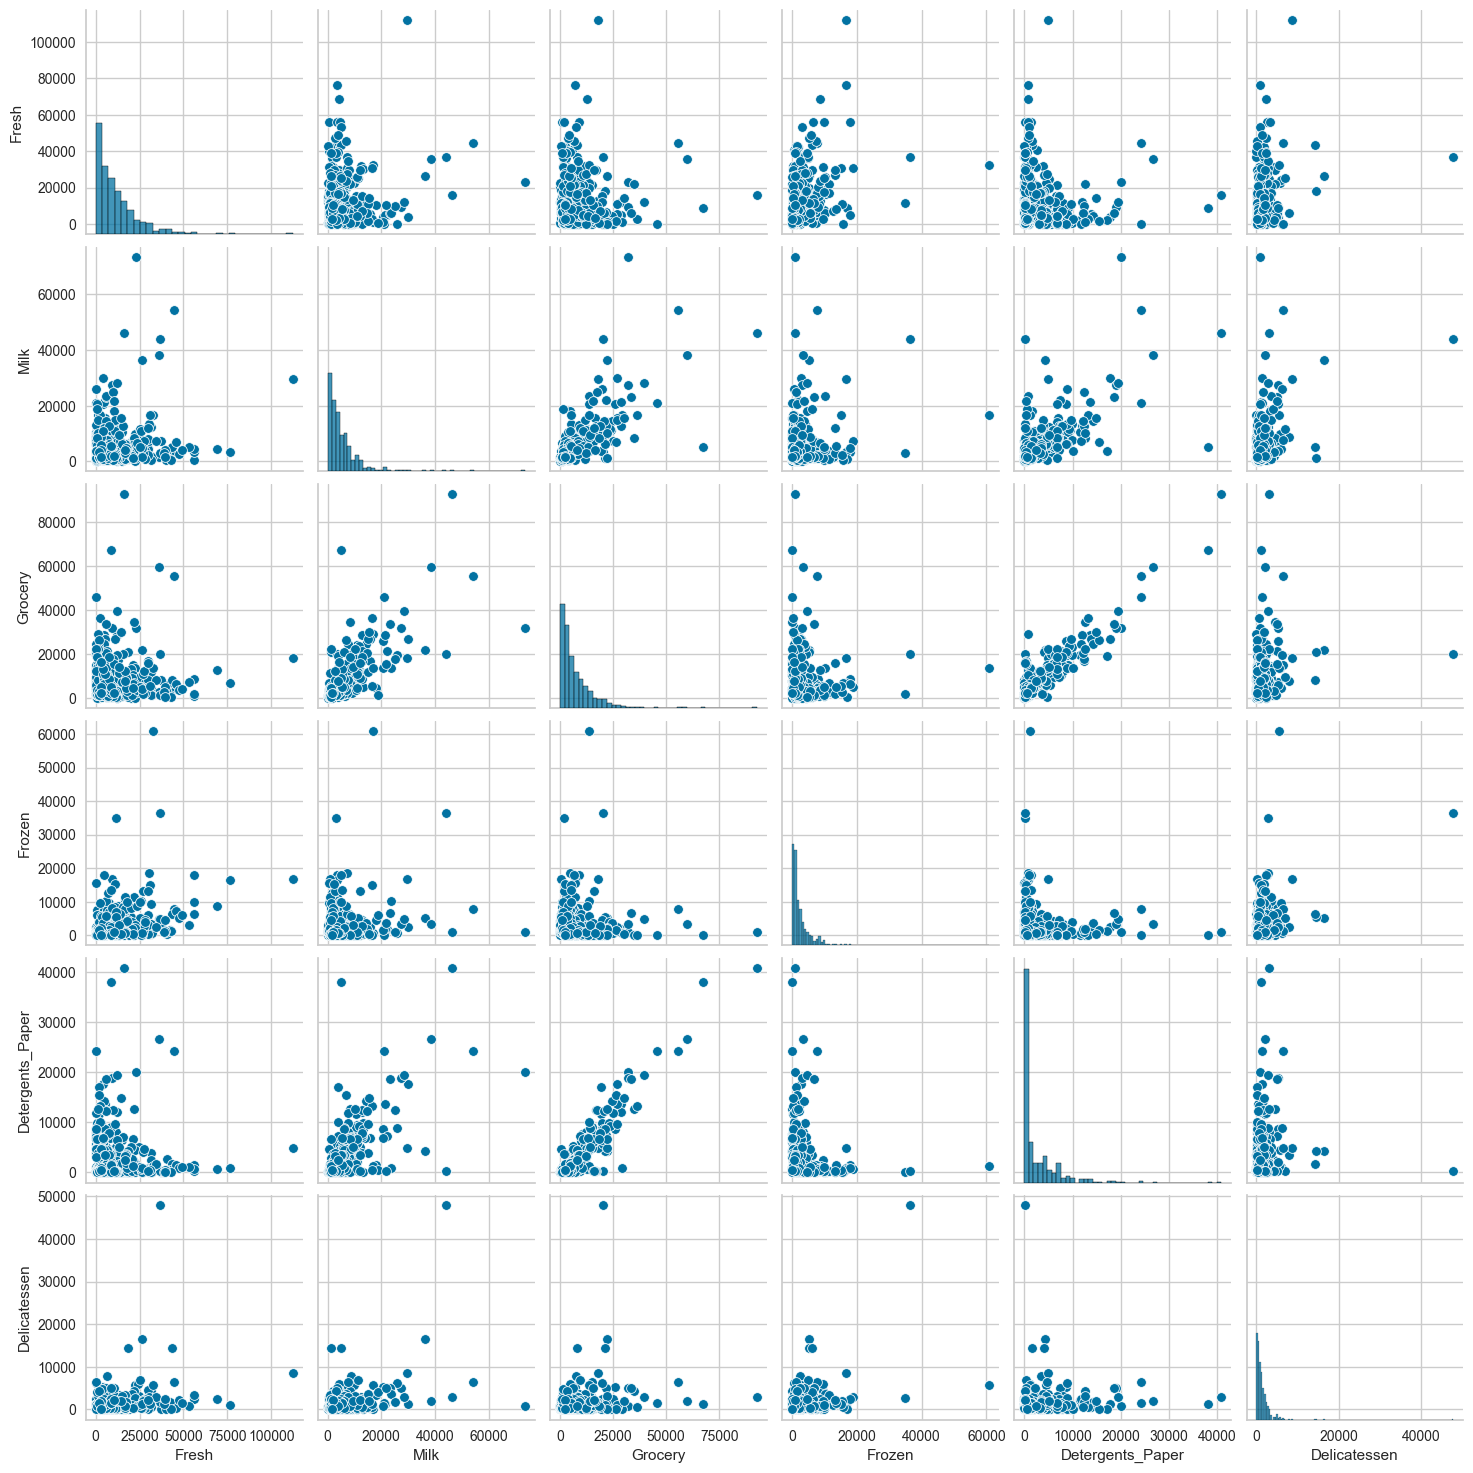

In [24]:
# matrice de visualisation

sns.pairplot(df)

##### ANALYSE EN COMPOSANTE PRINCIPALE 

Permet de reduire la dimensionnalité des variables. Cette méthode nous est utile en cas de grand nombre de variables

In [25]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [26]:
# Dataframe des variables numériques du df

data = df.drop(['Channel', 'Region'], axis = 1)

In [27]:
# standardisation de nos variables

scaler = StandardScaler()

data = scaler.fit_transform(data)

type(data)



numpy.ndarray

In [28]:
#affichage des data 

data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [29]:
# sauvegarde du tableau numpy data 

np.save('./training_data.npy', data)

In [30]:
# application de l'ACP (2 composantes)

pca = PCA(n_components= 2)
res_pca = pca.fit_transform(data)
type(res_pca)


numpy.ndarray

In [31]:
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

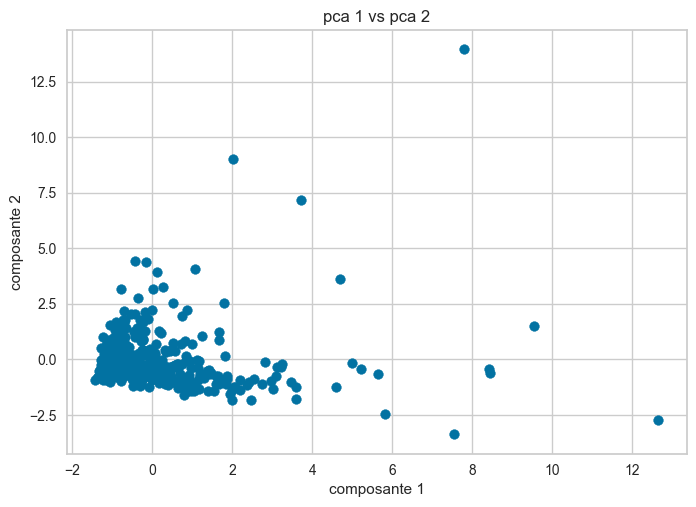

In [32]:
# visualisation des composantes principales 

plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("pca 1 vs pca 2")
plt.show()

In [33]:
# coefficient de correlation de pearson 

pearsonr(res_pca[:,0], res_pca[:,1])[0]
"""correlation faible, il n y a pas de correlation linéaire entre les variables"""

'correlation faible, il n y a pas de correlation linéaire entre les variables'

### ACP NON LINEAIRE

Reduction non lineaire de dimensionnalité. Utilisation de KernelPCA.

In [34]:
# chargement de notre tableau numpy d'entrainement

data = np.load("training_data.npy")


In [35]:
# KPCA avec le noyau rbf

kpca = KernelPCA(n_components= 2, kernel='rbf')

res_kpca_rbf = kpca.fit_transform(data)

type(res_kpca_rbf)



numpy.ndarray

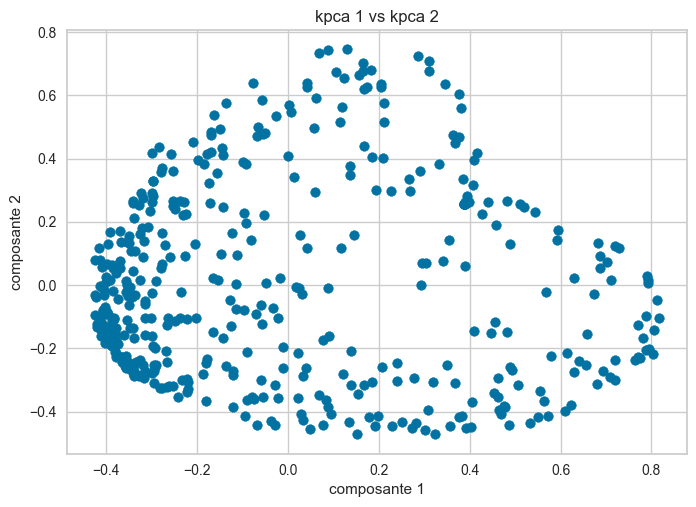

In [36]:
# visualisation des composantes principales 

plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("kpca 1 vs kpca 2")
plt.show()

In [37]:
#coefficient de correlation de pearson (kernel = 'rbf')

pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])[0]



9.90960785651751e-17

In [38]:
#comparaison des composantes 

pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:,1])[0] < pearsonr(res_pca[:,0], res_pca[:,1])[0] 


True

L'ACP non linéaire est plus performante que l'ACP lineaire


In [39]:
# ajout des composantes principales

df['x_kpca_rbf'] = res_kpca_rbf[:,0]
df['y_kpca_rbf'] = res_kpca_rbf[:,1]
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415


##### Clustering K-means 

In [40]:
#clustering avec 5 clusters 

cluster_model = KMeans(n_clusters=5)
cluster_model.fit(res_kpca_rbf)
clusters = cluster_model.predict(res_kpca_rbf)

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# affichage des clusters
clusters

array([4, 4, 2, 0, 2, 1, 1, 4, 1, 3, 4, 1, 2, 3, 2, 1, 4, 1, 2, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 3, 2, 0, 1, 0, 2, 1, 4, 2, 3, 3, 2, 2, 0, 3, 3,
       4, 3, 3, 2, 4, 3, 1, 1, 2, 4, 0, 1, 2, 3, 1, 4, 4, 2, 4, 3, 1, 2,
       4, 4, 1, 1, 0, 2, 0, 0, 4, 0, 1, 3, 1, 1, 1, 3, 4, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 4, 1, 4, 1, 1, 0, 3, 3, 4, 2, 1, 0, 4, 3, 4, 3,
       1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 4, 2, 2, 0, 2, 4, 2, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 0, 2, 2, 0, 0, 3, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 3, 3, 0, 4, 3, 4, 1, 0, 3, 4, 3, 4, 1, 1, 1, 3, 3, 4, 3, 1, 4,
       2, 1, 1, 1, 4, 2, 4, 2, 1, 1, 1, 4, 4, 4, 0, 1, 1, 3, 1, 0, 2, 4,
       1, 1, 3, 3, 2, 1, 1, 3, 1, 4, 4, 3, 0, 2, 1, 4, 4, 3, 3, 0, 3, 1,
       0, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 4, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 1, 4, 3, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1,
       3, 2, 3, 0, 3, 0, 1, 1, 4, 2, 1, 1, 2, 2, 0, 4, 1, 1, 2, 2, 2, 2,
       1, 0, 0, 2, 1, 1, 1, 3, 0, 1, 0, 1, 4, 1, 1,

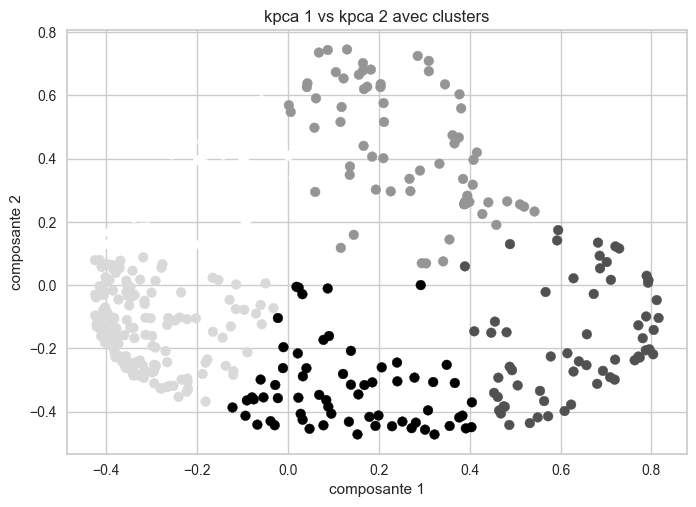

In [42]:
# Vérification des clusters 

plt.scatter(res_kpca_rbf[:,0], res_kpca_rbf[:,1], c= clusters)
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("kpca 1 vs kpca 2 avec clusters")
plt.show()

In [43]:
# installation de yellowbricks 
# pip install -U yellowbricks

"""yellowbricks est une extension de sklearn dedié à la visualisation des outils de ML"""

'yellowbricks est une extension de sklearn dedié à la visualisation des outils de ML'

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

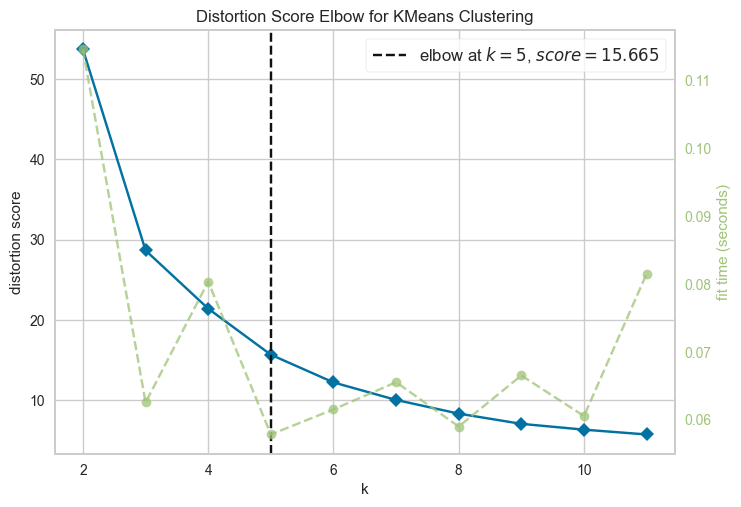

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# Méthode du coude:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(res_kpca_rbf)
visualizer.show()


In [45]:
# ajout des clusters à df et sauvegarde au format csv

df['cluster_kpca_rbf'] = clusters
df.to_csv("./data_with_clusters.csv")


In [46]:
# chargement des données 

df = pd.read_csv('./data_with_clusters.csv', index_col = 0)


In [47]:
# Cinq premiières observations 
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,4
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,4
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,2
3,HoReca,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,0
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,2


In [48]:
df['cluster_kpca_rbf'].unique()

array([4, 2, 0, 1, 3], dtype=int64)

In [49]:
# je peux convertir le cluster en str 

df['cluster_kpca_rbf'] = df['cluster_kpca_rbf'].astype(str)


In [50]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    object 
 1   Region            440 non-null    object 
 2   Fresh             440 non-null    int64  
 3   Milk              440 non-null    int64  
 4   Grocery           440 non-null    int64  
 5   Frozen            440 non-null    int64  
 6   Detergents_Paper  440 non-null    int64  
 7   Delicatessen      440 non-null    int64  
 8   x_kpca_rbf        440 non-null    float64
 9   y_kpca_rbf        440 non-null    float64
 10  cluster_kpca_rbf  440 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 41.2+ KB


In [57]:
#centroides 

df.groupby("cluster_kpca_rbf")[features[2:6]].mean()


,Fresh,Milk,Grocery,Frozen
cluster_kpca_rbf,,,,
0,17569.506173,2351.679012,3157.061728,4259.222222
1,6538.062893,2390.238994,2977.622642,1705.238994
2,29583.671233,11270.945205,12885.630137,7836.178082
3,5357.064516,11624.112903,19493.741935,1360.161290
4,5010.815385,6713.061538,9540.538462,1217.676923


In [58]:
# centrer 

df.groupby(["cluster_kpca_rbf", "Channel", "Region"])[features[2:6]].mean()


Fresh          Milk       Grocery  \
cluster_kpca_rbf Channel Region                                             
0                HoReca  Lisbon  16912.176471   1504.000000   2178.823529   
                         Other   18005.255319   2370.978723   2898.021277   
                         Porto   17039.636364   1979.818182   3843.454545   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   17521.500000   4948.500000   6342.500000   
1                HoReca  Lisbon   6580.461538   2444.615385   2693.269231   
                         Other    6021.242991   2297.859813   2595.775701   
                         Porto    7070.600000   1708.266667   4009.933333   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   11887.428571   4446.714286   5953.571429   
                         Porto   10708.666667   3779.666667   6193.333333   
2                HoReca  Lisbon  31168.666667   9313.333333   7786.666667   
                         Other   34887.564103   6569.153846   5962.948718   
                         Porto   16360.000000   8558.500000  10323.500000   
                 Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                         Other   23057.333333  22303.388889  25736.555556   
                         Porto   17490.000000   4241.666667  26943.666667   
3                HoReca  Lisbon   2806.000000  10765.000000  15538.000000   
                         Other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                         Other    5849.205128  11311.128205  19740.820513   
                         Porto    4402.300000  12776.000000  18218.700000   
4                HoReca  Lisbon   3218.333333   7438.166667   7476.500000   
                         Other    3332.312500   5690.250000   8992.187500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Other    6374.567568   7013.243243  10133.918919   
                         Porto    3295.666667   7600.333333   9534.000000   

                                       Frozen  
cluster_kpca_rbf Channel Region                
0                HoReca  Lisbon   3719.529412  
                         Other    4368.574468  
                         Porto    4963.727273  
                 Retail  Lisbon   5040.000000  
                         Other    2940.250000  
1                HoReca  Lisbon   1858.769231  
                         Other    1663.766355  
                         Porto    1986.000000  
                 Retail  Lisbon   5612.000000  
                         Other     954.857143  
                         Porto     898.666667  
2                HoReca  Lisbon   7238.666667  
                         Other    9338.282051  
                         Porto   38235.000000  
                 Retail  Lisbon   5741.000000  
                         Other    2316.277778  
                         Porto    4351.666667  
3                HoReca  Lisbon   1374.000000  
                         Other    3388.000000  
                 Retail  Lisbon   1435.400000  
                         Other    1292.384615  
                         Porto    1142.300000  
4                HoReca  Lisbon   1071.666667  
                         Other    1080.687500  
                 Retail  Lisbon   1662.000000  
                         Other    1306.621622  
                         Porto     699.000000